In [2]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['ggplot2', 'dplyr', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [12]:
%%R
df <- read.table("../data/summary_tbls/160708_eric_smr_summary_table.txt", sep="\t", header=TRUE)
head(df)
str(df)

'data.frame':	34 obs. of  15 variables:
 $ X                                  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Unnamed..0                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ sag                                : Factor w/ 17 levels "AD-967-E21","AG-128-L10",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ metagenome                         : Factor w/ 2 levels "OV-2_P2_metagenome",..: 1 2 1 2 1 2 1 2 1 2 ...
 $ Percent_scaffolds_with_any_coverage: num  100 100 100 100 100 100 100 100 100 100 ...
 $ Percent_of_reference_bases_covered : num  2.51 3.37 14.38 60.68 2 ...
 $ Average_coverage                   : num  0.1731 0.163 0.2481 3.1078 0.0549 ...
 $ total_reads_recruited              : int  1537 1734 2356 24089 53 142 417 737 613 2142 ...
 $ mg_wgs_technology                  : Factor w/ 1 level "illumina": 1 1 1 1 1 1 1 1 1 1 ...
 $ mg_read_count                      : int  10569894 17302977 10569894 17302977 10569894 17302977 10569894 17302977 10569894 17302977 ...
 $ sag_completeness         

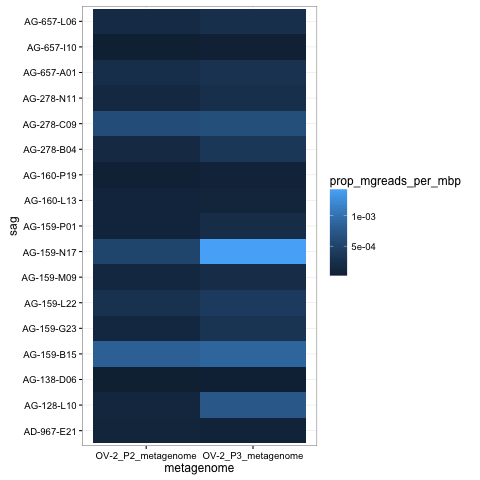

In [16]:
%%R
p1 <- df %>% ggplot(aes(metagenome, sag)) + geom_tile(aes(fill=prop_mgreads_per_mbp)) + theme_bw()

In [18]:
%%R

# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df = pd.read_csv("../data/summary_tbls/160708_eric_smr_summary_table.txt", sep="\t")

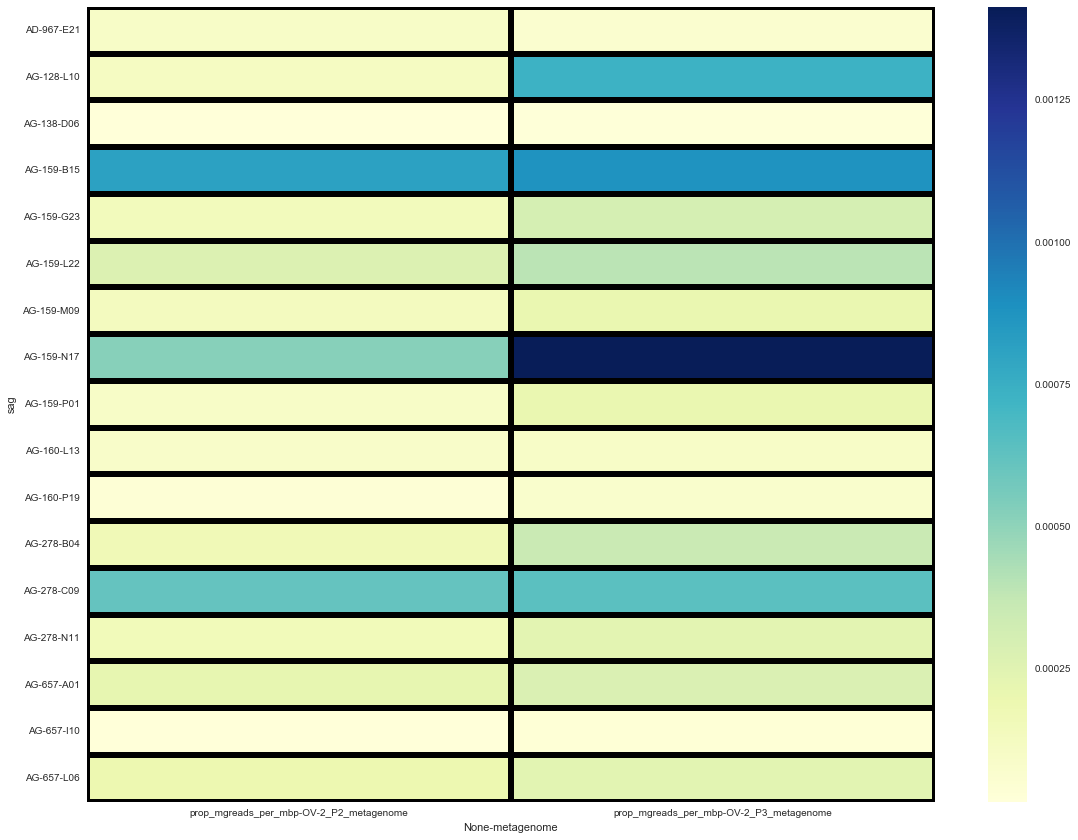

In [20]:
pmr = df[['sag','metagenome','prop_mgreads_per_mbp']].pivot(index='sag', columns='metagenome')

fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((20,20), (0,0), colspan=19, rowspan=19)
#ax2 = plt.subplot2grid((20,20), (19,0), colspan=19, rowspan=1)
#ax3 = plt.subplot2grid((20,20), (0,19), colspan=1, rowspan=19)

hm = sns.heatmap(pmr, ax=ax1, annot=False, cmap="YlGnBu", linecolor='black', 
            linewidth=5, cbar = True)

```
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((20,20), (0,0), colspan=19, rowspan=19)
ax2 = plt.subplot2grid((20,20), (19,0), colspan=19, rowspan=1)
ax3 = plt.subplot2grid((20,20), (0,19), colspan=1, rowspan=19)

mask = np.zeros_like(pv)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(pv, ax=ax1, annot=True, cmap="YlGnBu",mask=mask, linecolor='b', cbar = False)
ax1.xaxis.tick_top()
ax1.set_xticklabels(pv.columns,rotation=40)

sns.heatmap((pd.DataFrame(pv.sum(axis=0))).transpose(), ax=ax2,  annot=True, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False)
sns.heatmap(pd.DataFrame(pv.sum(axis=1)), ax=ax3,  annot=True, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False)
```

In [8]:
g = df.groupby(['sag'])
newser = g['total_reads_recruited'].sum()/g['mg_read_count'].sum()
newser
#>>> data.groupby(func, axis=0).mean()
#>>> data.groupby(['col1', 'col2'])['col3'].mean()
print(newser.index)
print(newser.values)

Index([u'AD-967-E21', u'AG-128-L10', u'AG-138-D06', u'AG-159-B15',
       u'AG-159-G23', u'AG-159-L22', u'AG-159-M09', u'AG-159-N17',
       u'AG-159-P01', u'AG-160-L13', u'AG-160-P19', u'AG-278-B04',
       u'AG-278-C09', u'AG-278-N11', u'AG-657-A01', u'AG-657-I10',
       u'AG-657-L06'],
      dtype='object', name=u'sag')
[  1.17354255e-04   9.48772016e-04   6.99605003e-06   4.14022653e-05
   9.88416299e-05   2.42206840e-04   1.66470114e-04   4.37809223e-04
   1.21264867e-05   3.93931432e-05   8.39167232e-05   7.41007268e-04
   1.06124697e-03   2.38942016e-04   1.02501102e-04   2.40735875e-05
   2.34026843e-04]


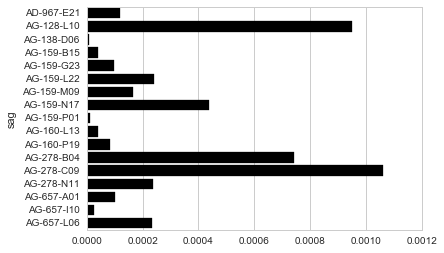

In [21]:
sns.set_style("whitegrid")
sp = sns.barplot(y=newser.index, x=newser.values, color="black")